In [1]:
from noisy_trotter import *
import matplotlib.pyplot as plt

In [6]:
### Test exact simulation
num_qubits = 2
theta = np.pi/4

# gates are tuples (superoperator, [first qubit it acts on, second qubit it acts on])
# circuit is a list of gates, with leftmost gate acting on state first
gate1 = (exact_rz(theta), [0,])
gate2 = (exact_rz(theta), [1,])
circ = [gate1, gate2]

# states can be vectors or density matrices
init_state = np.random.rand(2**num_qubits) 
init_state = init_state / np.linalg.norm(init_state)

a=circuit_action(circ, init_state)
rz = np.array([[np.exp(-1.j*theta/2), 0], [0, np.exp(1.j*theta/2)]])
target_state = np.kron(rz,rz) @ init_state
b=np.outer(target_state, target_state.conj().T)

a-b

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [7]:
### Test noisy simulation
num_qubits = 2
init_state = np.zeros(2**num_qubits) 
init_state[0] = 1.0 

# first run the exact circuit
gate1 = (exact_x, [0,]) 
gate2 = (exact_cx_top, [0,1])
circ = [gate1, gate2]
exact_state = circuit_action(circ, init_state)

# now run the noisy circuit
gate1 = (noisy_x, [0,]) 
gate2 = (noisy_cx_top, [0,1])
circ = [gate1, gate2]
noisy_state = circuit_action(circ, init_state)

# now compare
fidelity(exact_state, noisy_state)

(0.9946596262931248+0j)

In [9]:
### Test compilation of XY interation in terms of noisy superoperators
num_qubits = 2
t = 0.5
init_state = np.zeros(2**num_qubits)
init_state[int('10'*(num_qubits//2),2)] = 1.0 # Neel state

# first do exact evolution
ham = xy_ham(num_qubits)
exact_state = expm(-1.j*t*ham) @ init_state
exact_state = np.outer(exact_state, exact_state.conj())

# now do noisy Trotter evolution
circ = xy_gate_noisy(t, 0, 1)
noisy_state = circuit_action(circ, init_state)

# now compare
fidelity(exact_state, noisy_state)  ## note the significant imaginary part is because the noisy model is not exactly CPTP

(0.9882104525420845+1.805661305305994e-07j)

In [10]:
### Find optimal step size for 10 qubit first order Trotter
num_qubits = 10
init_state = np.zeros(2**num_qubits)
init_state[int('10'*(num_qubits//2),2)] = 1.0 
total_time = 1.0
num_step_opts = np.arange(1,10)
output_file = '10q_1.pickle'
optimal_step(num_qubits, init_state, total_time, num_step_opts, output_file)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:58<00:00, 19.87s/it]


In [11]:
with open('10q_1.pickle', 'rb') as f:
    fidelity_list = pickle.load(f)

Text(0.5, 1.0, '10 qubits, T=1.0')

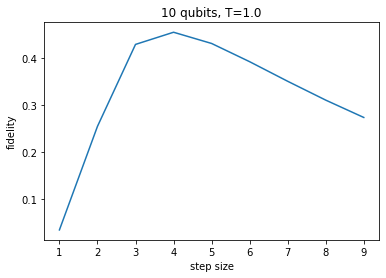

In [12]:
plt.plot(num_step_opts, fidelity_list)
plt.xlabel('step size')
plt.ylabel('fidelity')
plt.title('10 qubits, T=1.0')